# Transitions NREM-REM

In [1]:
import sys
import itertools

import numpy as np
import pandas as pd
import scipy.signal
from scipy.signal import savgol_filter

from tqdm import tqdm

import neuroseries as nts


import time
import matplotlib.pyplot as plt
# %matplotlib qt

import seaborn as sns 
import bk.load
import bk.compute
import bk.plot

import os
%load_ext memory_profiler

In [2]:
bk.load.current_session_linux()
neurons, metadata = bk.load.loadSpikeData(bk.load.path)
states = bk.load.states()
transitions,times = bk.compute.transitions_times(states)

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


In [62]:
transition_interest = [('Rem','sws'),('sws','Rem'),('Rem','wake')]

In [63]:
%matplotlib qt

In [65]:
s = "ABC"
fig,ax = plt.subplot_mosaic('ABC')
for ii,i in enumerate(transition_interest):
    binned = []
    for event,trans_time in zip(transitions[i].as_units('s').iloc,times[i].as_units('s').index.values):
        start = event.start
        end = event.end
        
        if (end-trans_time)<50 or (trans_time-start) <50: continue
#         if (end-trans_time) > 180: end = trans_time+120
#         if (trans_time-start) > 180: start = trans_time-120
        
        
        
        t_pre,b_pre = bk.compute.binSpikes(neurons,start = start,stop = trans_time,nbins=30)
        t_post,b_post = bk.compute.binSpikes(neurons,start = trans_time,stop = end,nbins=12)
        b_pre = b_pre/((trans_time-start)/30)
        b_post = b_post/((end-trans_time)/12)
        t = np.hstack((t_pre,t_post))
        b = np.hstack((b_pre,b_post))
        
#         plt.figure()
#         plt.plot(t,b.T)
#         plt.axvline(trans_time,color = 'red')
        binned.append(b)
    ax[s[ii]].plot(np.mean(binned,0).T)

In [57]:
plt.suptitle('Transition')

Text(0.5, 0.98, 'Transition')

In [60]:
plt.sca(ax['A'])
plt.title('REM-NREM')
plt.xlabel('Time')
plt.ylabel('Firing Rates (Hz)')

Text(63.847222222222214, 0.5, 'Firing Rates (Hz)')

In [45]:
binned = np.array(binned)
binned.shape

(7, 252, 42)

In [46]:
np.mean(binned,0).shape

(252, 42)

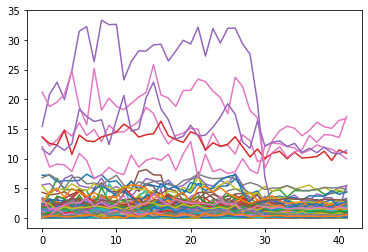

In [47]:
plt.plot(np.mean(binned,0).T)

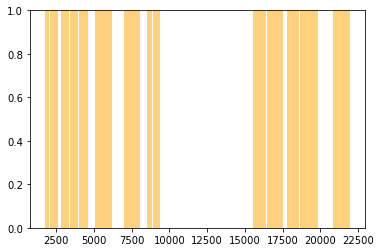

In [10]:
bk.plot.intervals(transition[('sws','Rem')])